In [ ]:
Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - 1 балл
Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - 2 балла
Постройте график типа boxplot для столбца Age - 1 балл
Проинтепретируйте полученный график - 1 балл
Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах - 1 балл
Постройте график типа pairplot для всех числовых переменных датасета - 1 балл
Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии
- количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе - 2 балла
Снабдите все построенные графики наименованиями (title), подписями осей, легендами - 1 балл

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - 1 балл

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


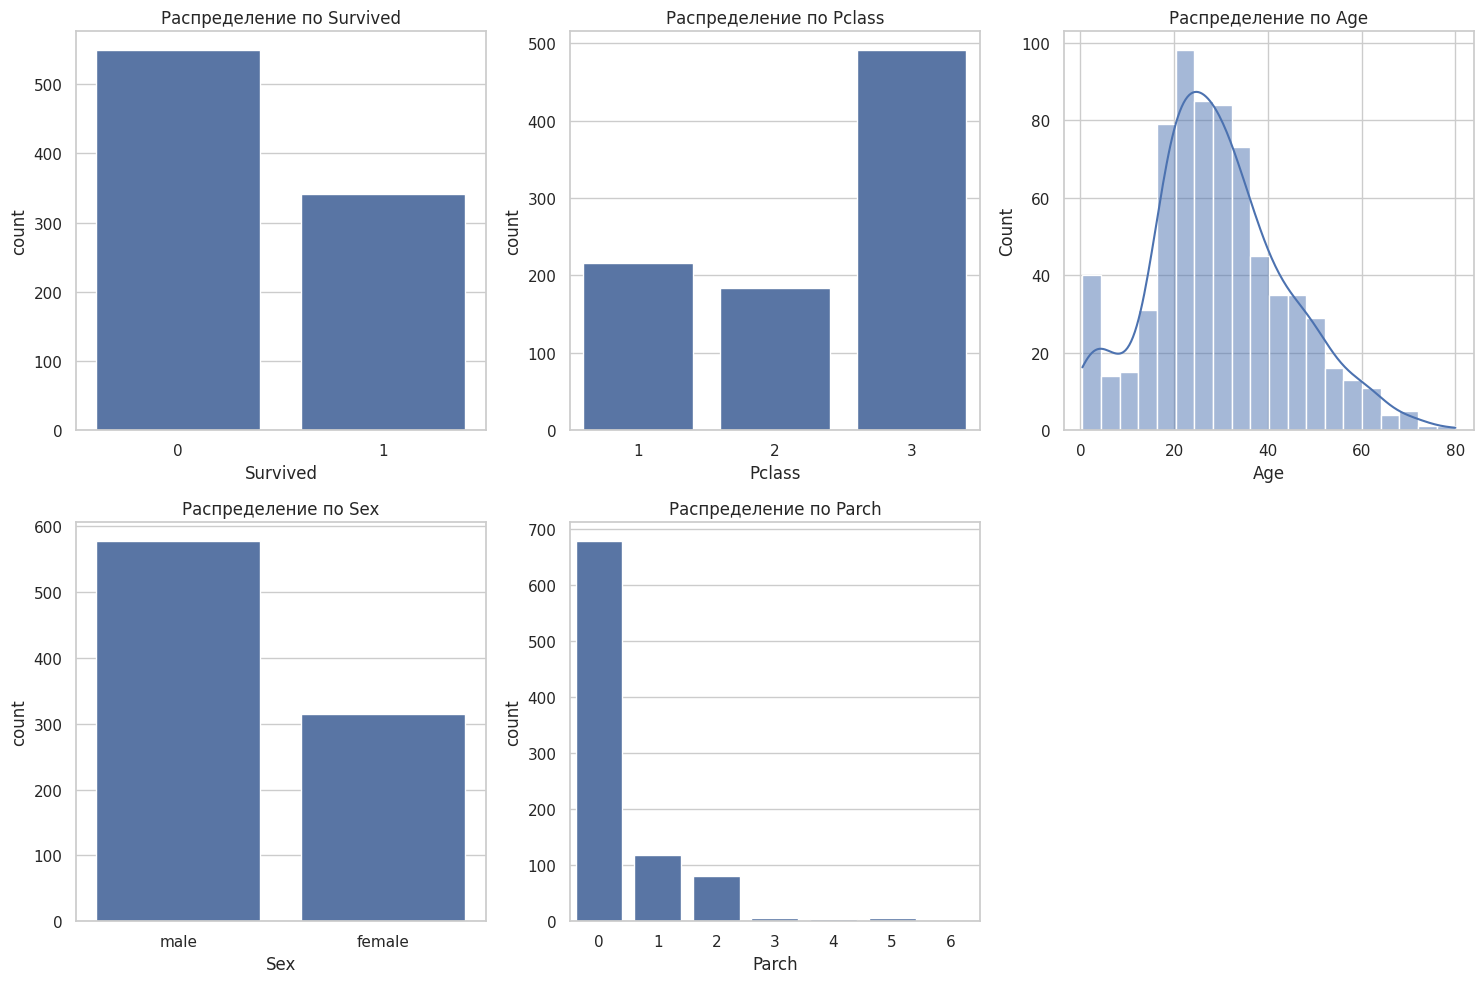

In [53]:
# Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - 2 балла

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(data=df, x='Survived', ax=axs[0, 0])
axs[0, 0].set_title('Распределение по Survived')

sns.countplot(data=df, x='Pclass', ax=axs[0, 1])
axs[0, 1].set_title('Распределение по Pclass')

sns.histplot(df['Age'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Распределение по Age')

sns.countplot(data=df, x='Sex', ax=axs[1, 0])
axs[1, 0].set_title('Распределение по Sex')

sns.countplot(data=df, x='Parch', ax=axs[1, 1])
axs[1, 1].set_title('Распределение по Parch')

axs[1, 2].axis('off')
plt.tight_layout()
plt.show()

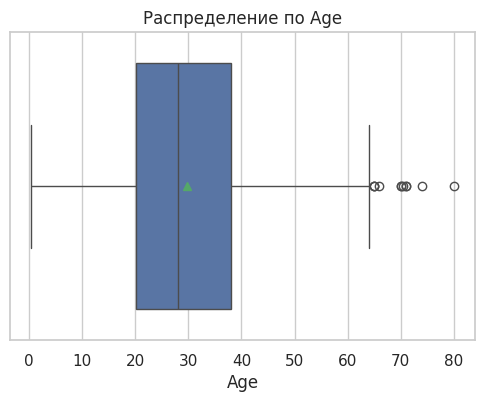

In [25]:
# Постройте график типа boxplot для столбца Age - 1 балл

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Age', showmeans=True)
plt.title('Распределение по Age')
plt.show()

## Проинтепретируйте полученный график - 1 балл
это можно интерпретировать так - минимум находится около 0, максимум находится примерно на 64, выбросы по максимуму имеются, но в незначительном количестве (можно пренебречь). средний возраст примерно 28, первый квартиль равен 20, третий квартиль равен примерно 38, межквартильный размах равен 18

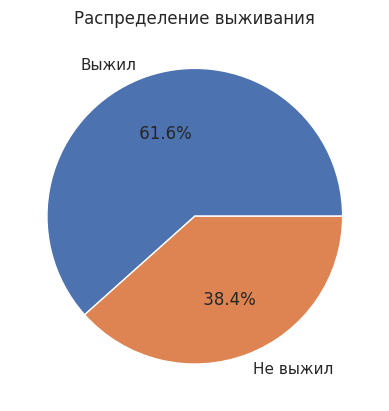

In [33]:
# Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах - 1 балл

counts = df['Survived'].value_counts()

fig, ax = plt.subplots()
ax.pie(counts, labels=['Выжил', 'Не выжил'], autopct= ' %1.1f%%');
plt.title('Распределение выживания')
plt.show()

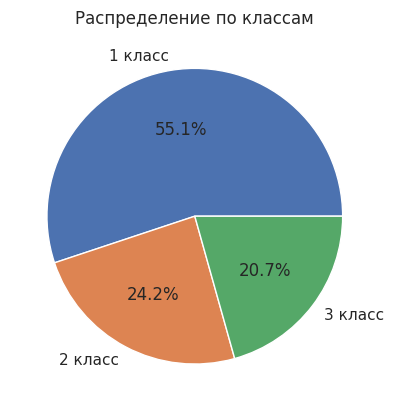

In [34]:
pclass_counts = df['Pclass'].value_counts()

fig, ax = plt.subplots()
ax.pie(pclass_counts, labels=['1 класс', '2 класс', '3 класс'], autopct='%1.1f%%')

plt.title('Распределение по классам')
plt.show()

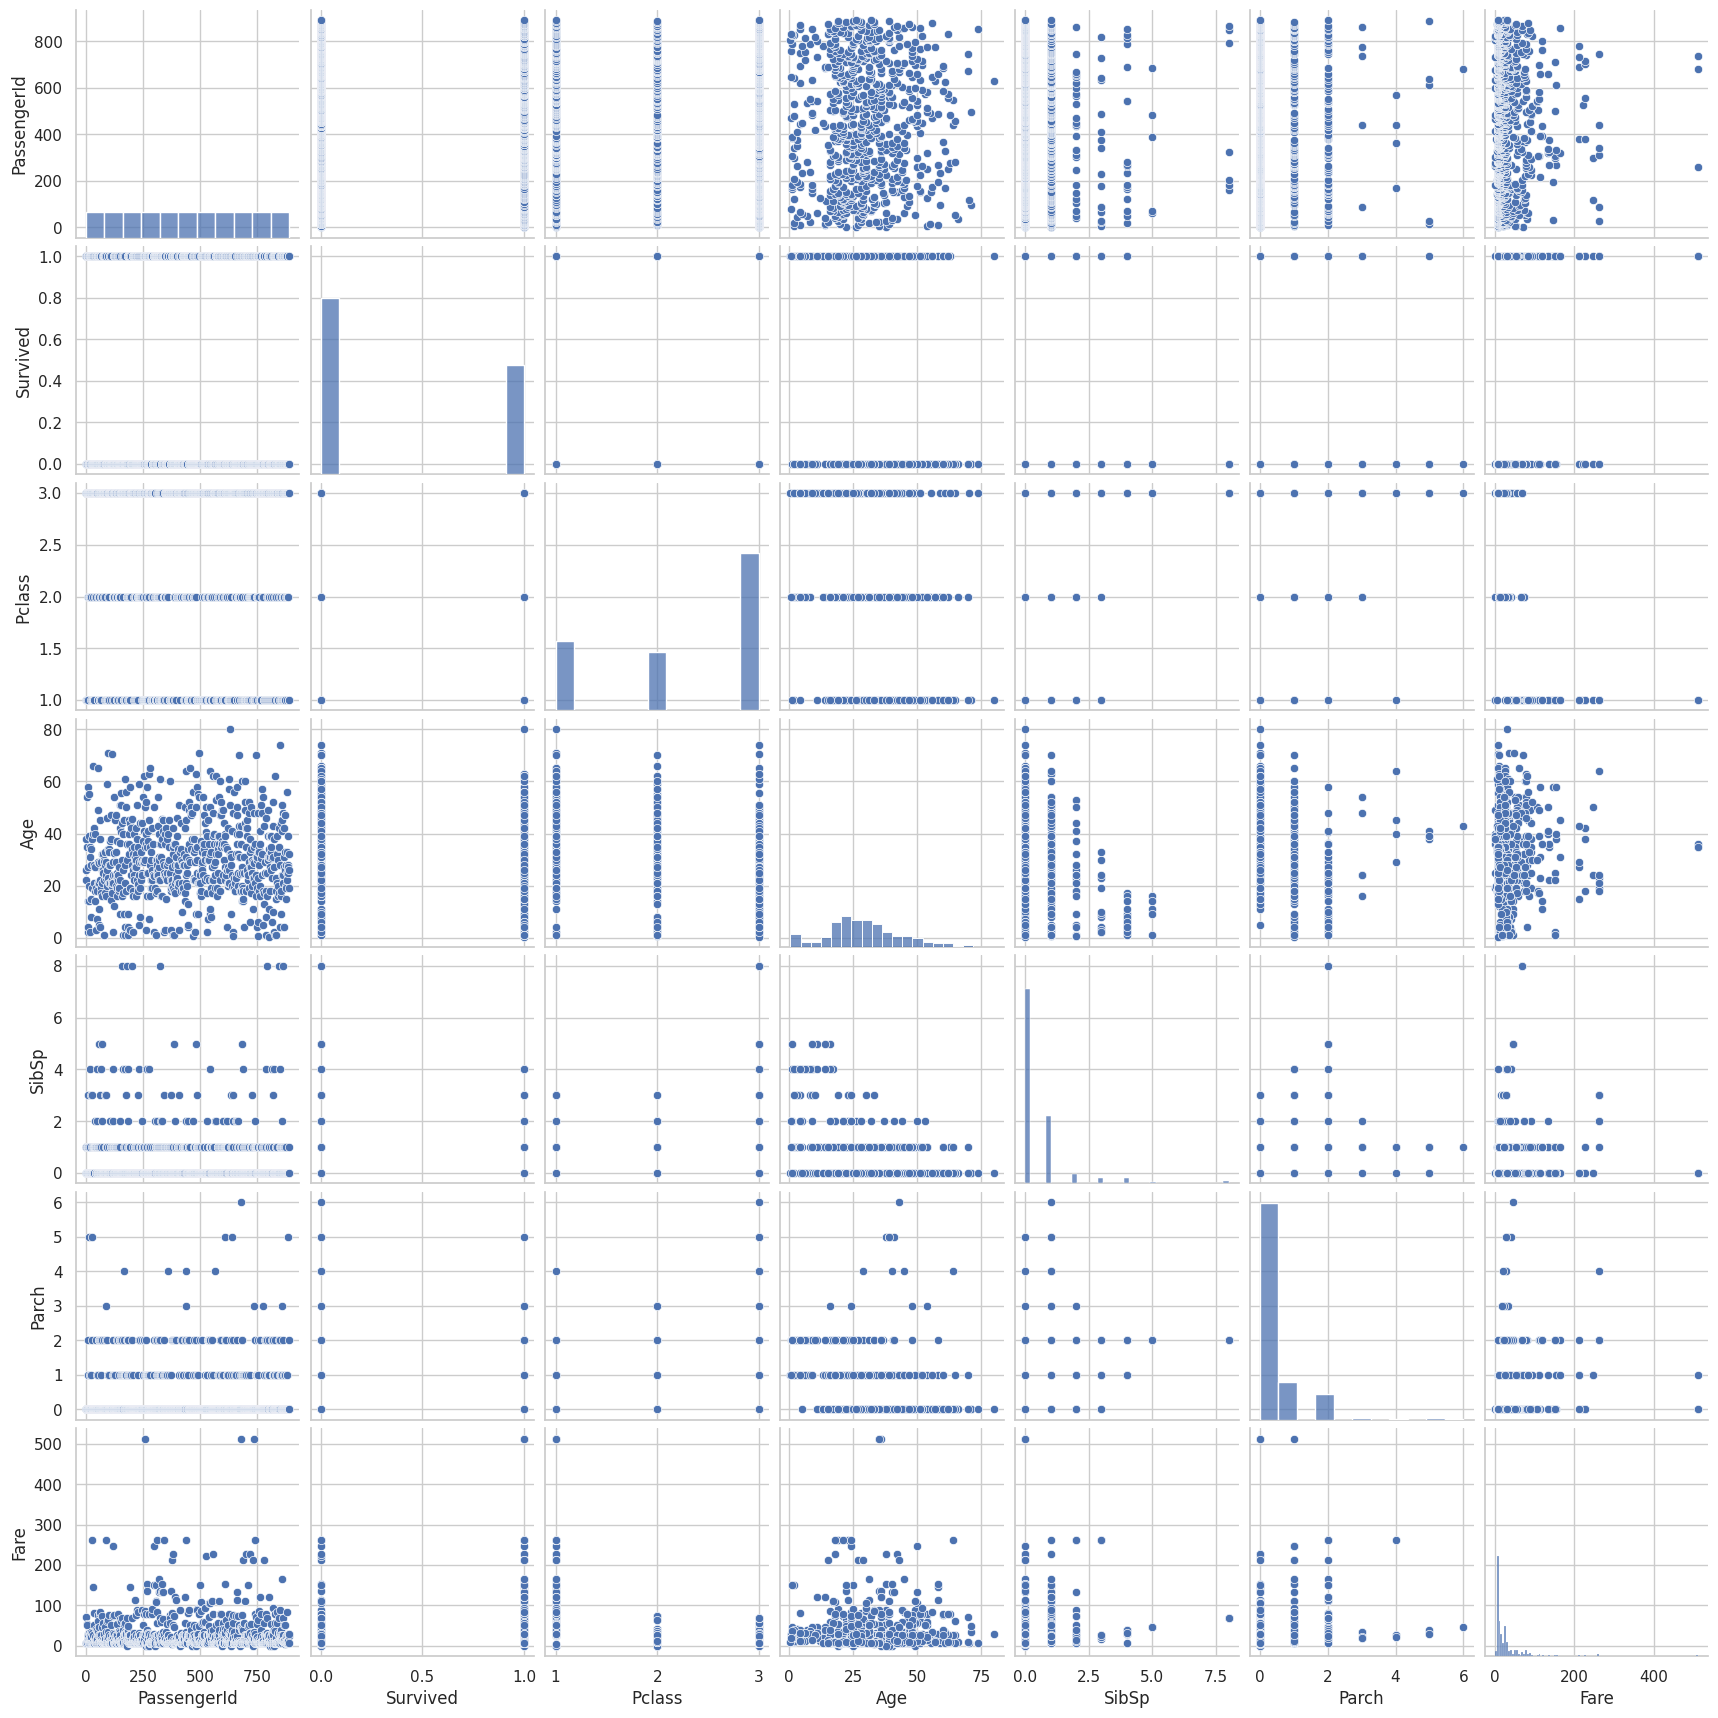

In [41]:
# Постройте график типа pairplot для всех числовых переменных датасета - 1 балл

sns.pairplot(df)
plt.show()

In [49]:
# Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии
# - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе - 2 балла

import plotly.express as px
fig = px.sunburst(df,
                  path=['Pclass', 'Sex'],
                  title="Sunburst plot по классам и полам",
                  values='Survived')

fig.show()